In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


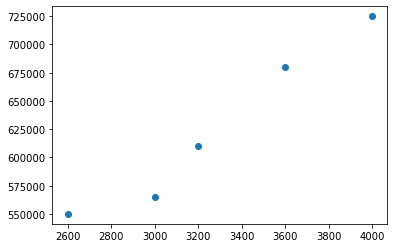

In [5]:
plt.scatter(x='area', y='price', data=df)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()

In [8]:
df['area'].values.reshape(1,-1)

array([[2600, 3000, 3200, 3600, 4000]], dtype=int64)

In [9]:
reg.fit(df[['area']],df[['price']])

LinearRegression()

In [10]:
reg.predict([[2729]])

array([[551180.99315068]])

In [11]:
reg.coef_.item()

135.78767123287673

In [12]:
reg.intercept_.item()

180616.43835616432

In [13]:
X_line = np.linspace(2600,4000,5)

In [14]:
Base_Line = reg.coef_.item()*df['area'] + reg.intercept_.item()

In [15]:
Base_Line

0    533664.383562
1    587979.452055
2    615136.986301
3    669452.054795
4    723767.123288
Name: area, dtype: float64

In [16]:
predicted_line = reg.coef_.item()*X_line + reg.intercept_.item()

In [17]:
predicted_line

array([533664.38356164, 581190.06849315, 628715.75342466, 676241.43835616,
       723767.12328767])

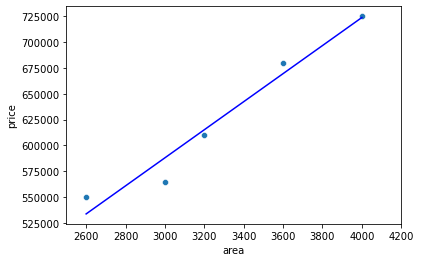

In [18]:
sns.scatterplot(x='area', y='price', data=df)
plt.xlim([2500,4200])
plt.plot(X_line, predicted_line, color='blue')
# plt.show()

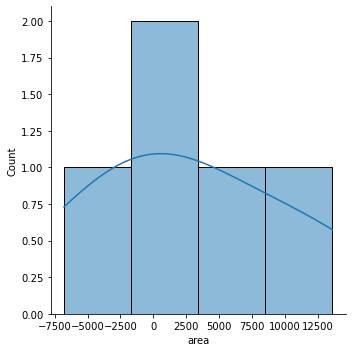

In [19]:
sns.displot(predicted_line-Base_Line,kde=True)

In [20]:
area = pd.read_csv('areas.csv')

In [21]:
area.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [22]:
area['price'] = reg.predict(area[['area']])

In [23]:
area.head()

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [31]:
# area.to_csv("Prediction.csv",index=False)

# Saving Models

In [26]:
import pickle

In [27]:
with open ('model.pickle','wb') as f:
    pickle.dump(reg,f)

In [29]:
with open ('model.pickle','rb') as f:
    reg_pickle = pickle.load(f)

In [32]:
reg_pickle.predict([[5000]])

array([[859554.79452055]])

In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string:

In [34]:
from joblib import dump,load

In [35]:
dump(reg,'model_joblib')

['model_joblib']

In [36]:
reg_job = load('model_joblib')

In [37]:
reg_job.predict([[5000]])

array([[859554.79452055]])